# Clasificando e-mails en Deseado y Spam Con Redes Neuronales Profundas

![spam](img/que-es-el-spam.png)

### Spam

El Spam, también conocido como «correo no deseado», es información no solicitada por el que la recibe y que se envía de manera masiva a través de Internet o de canales de comunicación más tradicionales. En la mayoría de las ocasiones, se suele hablar de este tipo de contenidos no solicitados en el ámbito del Email Marketing, cuando recibimos correos no deseados o de tipo Spam publicitario.

Por lo regular para clasificar los correos como Spam, el clasificador se basa en ciertos patrones o palabras que siguen este tipo de correos, a continuación enlisto algunos de los temas que contienen este tipo de correos
   * Ofertas comerciales o descuentos exagerados
   * Premios y sorteos que has ganado (sin participar)
   * Ofrecimiento de productos o servicios ‘sexuales’
   * Seguros o pólizas
   * Servicios médicos o relacionados con el hogar


### Obtención de Datos de proyecto

Para la realizacón del siguiente proyecto obtuve los datos de una publicación Dataset de Kaggle llamado "Email Spam Classification Dataset CSV" publicado por Balaka Biswas, el cual cuenta con un archivo csv con 5172 registros con 3002 columnas el cual se basa en un conteo de repeticiones de una gran variedad de palabras de uso comun a lo largo del texto del correo electronico, algunas de las palabras contempladas son "account", "market", "cost", entre muchas otras, además cuenta con una columna con la clasificación de Spam (1) y (0) correo deseado.

Liga [Email Spam Classification Dataset CSV](https://www.kaggle.com/balaka18/email-spam-classification-dataset-csv)

A continuación muestro el texto traducido al español de la descripción del dataset.

"El archivo csv contiene 5172 filas, cada fila representa cada correo electrónico. Hay 3002 columnas. La primera columna corresponde al nombre del correo electrónico. El nombre se ha configurado con números y no con el nombre de los destinatarios para proteger la privacidad. La última columna tiene las etiquetas de predicción: 1 para spam, 0 para no spam. Las 3000 columnas restantes son las 3000 palabras más comunes en todos los correos electrónicos, después de excluir los caracteres / palabras no alfabéticos. Para cada fila, el recuento de cada palabra (columna) en ese correo electrónico (fila) se almacena en las respectivas celdas. Por lo tanto, la información sobre todos los correos electrónicos 5172 se almacena en un marco de datos compacto en lugar de como archivos de texto separados."

### Redes Neuronales Profundas

El propósito principal de una red neuronal es recibir un conjunto de entradas, realizar cálculos progresivamente complejos en ellas y dar salida para resolver problemas del mundo real como la clasificación. 

Las redes neuronales se utilizan ampliamente en el aprendizaje supervisado y en los problemas de aprendizaje por refuerzo. Estas redes se basan en un conjunto de capas conectadas entre sí.

Principalmente utilizamos el método de descenso de gradiente para optimizar la red y minimizar la función de pérdida.

![rnp](img/redesneuronales.jpeg)

## Ejecución de Ejercicio

### Importando Librerias Necesarias

In [155]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

### 1. Lectura y Visualización de datos

In [156]:
data = pd.read_csv('./datos/emails.csv')
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [157]:
print("Número de características:", len(data.columns))
print("Longitud del conjunto de datos:", len(data))

Número de características: 3002
Longitud del conjunto de datos: 5172


In [158]:
data.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [159]:
# 1500 correos clasificados como spam, 3672 correos no spam
# El conjunto de datos se encuntra desequilabrado
data["Prediction"].value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [161]:
# Comprobamos si alguna columna tiene valores nulos
data.isna().any()

Email No.     False
the           False
to            False
ect           False
and           False
              ...  
military      False
allowing      False
ff            False
dry           False
Prediction    False
Length: 3002, dtype: bool

In [162]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
the,5172.0,6.640565,11.745009,0.0,0.0,3.0,8.0,210.0
to,5172.0,6.188128,9.534576,0.0,1.0,3.0,7.0,132.0
ect,5172.0,5.143852,14.101142,1.0,1.0,1.0,4.0,344.0
and,5172.0,3.075599,6.045970,0.0,0.0,1.0,3.0,89.0
for,5172.0,3.124710,4.680522,0.0,1.0,2.0,4.0,47.0
...,...,...,...,...,...,...,...,...
military,5172.0,0.006574,0.138908,0.0,0.0,0.0,0.0,4.0
allowing,5172.0,0.004060,0.072145,0.0,0.0,0.0,0.0,3.0
ff,5172.0,0.914733,2.780203,0.0,0.0,0.0,1.0,114.0
dry,5172.0,0.006961,0.098086,0.0,0.0,0.0,0.0,4.0


In [163]:
#Correlación de columnas
data.corr()

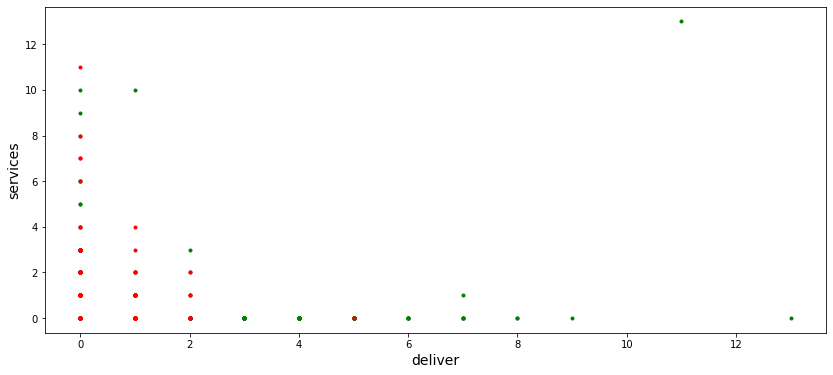

In [164]:
# Representación gráfica de dos de las multiples características ó columnas elegidas al azar
# En el grafico se muestran de color verde las datos de los correos clasicificados como correo deseado
# y de color rojo los datos clasificados como spam
plt.figure(figsize=(14, 6))
plt.scatter(data["deliver"][data['Prediction'] == 0], data["services"][data['Prediction'] == 0], c="g", marker=".")
plt.scatter(data["deliver"][data['Prediction'] == 1], data["services"][data['Prediction'] == 1], c="r", marker=".")
plt.xlabel("deliver", fontsize=14)
plt.ylabel("services", fontsize=14)
plt.show()

### 2. División de datos

A. Removeré los ultimos 5 renglones para hacer un nuevo dataframe par ahacer pruebas al finalizar el entrenamiento.

In [168]:
#nueva tabla para datos de prueba de nuevos datos al finalizar el aprendizaje
testdata = data.iloc[5168:5172, :]
testdata.reset_index(inplace=True) 
testdata

,level_0,Email No.,the,to,ect,and,for,of,a,you,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,5168,Email 5169,35,27,11,2,6,5,151,4,...,0,0,0,0,0,0,0,1,0,0
1,5169,Email 5170,0,0,1,1,0,0,11,0,...,0,0,0,0,0,0,0,0,0,1
2,5170,Email 5171,2,7,1,0,2,1,28,2,...,0,0,0,0,0,0,0,1,0,1
3,5171,Email 5172,22,24,5,1,6,5,148,8,...,0,0,0,0,0,0,0,0,0,0


In [192]:
#eliminando los renglones que se utilizaron para formar la nueva tabla de pruebas
data = data.drop([data.index[5168] , data.index[5169], data.index[5170], data.index[5171]])
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5163,Email 5164,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5164,Email 5165,21,18,3,1,6,4,106,1,2,...,0,0,0,0,0,0,0,0,0,0
5165,Email 5166,1,0,1,0,3,1,12,1,0,...,0,0,0,1,0,0,0,0,0,0
5166,Email 5167,1,0,1,1,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,1


B. División de datos en 3 grupos diferentes: datos de entrenamiento (train), de prueba (test) y de validación (val).

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X = data.loc[:,'the':'dry'].values 
y = data["Prediction"]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

### 3. Preparación del conjunto de datos

Para este tipo de algoritmos es importante que todos los datos se encuentren en un rango similar, por lo tanto, podemos aplicar una función de escalado o normalización. En este caso utilizaré MinMaxScaler de Scikit Learn

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler = MinMaxScaler()

In [70]:
scaler.fit(X_train)

MinMaxScaler()

In [71]:
X_train = scaler.transform(X_train) #scalando datos de entrenamiento

In [72]:
X_test = scaler.transform(X_test) #scalando datos de prueba

In [73]:
X_val = scaler.transform(X_val) #scalando datos de evaluacion

In [74]:
X_train

array([[0.03333333, 0.03603604, 0.00293255, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04285714, 0.04504505, 0.00293255, ..., 0.        , 0.01754386,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0990991 , 0.        , ..., 0.        , 0.02631579,
        0.        ],
       [0.01428571, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### 4. Definición de la arquitectura de la red neuronal

In [193]:
#importando tensorflow y keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [76]:
model = Sequential()
model.add(Dense(128, activation='relu')) #primera capa oculta de 128 neuronas con una función de activacion relu
model.add(Dense(64, activation='relu')) #segunda capa oculta de 64 neuronas con una función de activacion relu
model.add(Dense(32, activation='relu')) #tercera capa oculta de 32 neuronas con una función de activacion relu
model.add(Dense(1, activation='sigmoid')) # input una neurona con función de activacion sigmoide

model.compile(loss='binary_crossentropy', #error funcion binary_crossentropy por ser un resultado de 0 y 1
              optimizer='sgd', # optimazer desenso de gradiente
              metrics=['accuracy', 'Precision']) # metricos accurency y precision


En la variable ***history*** se almacenan varios valores importantes:
* El valor de los parámetros del modelo después del entrenamiento
* La lista de *epochs* llevados a cabo
* Un diccionario con el error producido en cada *epoch* en el conjunto de datos de entreanamiento y validación

In [77]:
history = model.fit(X_train, 
                    y_train,
                   epochs=300,
                   validation_data=(X_val, y_val))

Epoch 1/300
114/114 [==============================] - 1s 4ms/step - loss: 0.6627 - accuracy: 0.7008 - precision: 0.2482 - val_loss: 0.6188 - val_accuracy: 0.7010 - val_precision: 0.0000e+00
Epoch 2/300
114/114 [==============================] - 0s 2ms/step - loss: 0.6074 - accuracy: 0.7065 - precision: 0.0000e+00 - val_loss: 0.5985 - val_accuracy: 0.7010 - val_precision: 0.0000e+00
Epoch 3/300
114/114 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.7058 - precision: 0.0000e+00 - val_loss: 0.5867 - val_accuracy: 0.7010 - val_precision: 0.0000e+00
Epoch 4/300
114/114 [==============================] - 0s 2ms/step - loss: 0.5681 - accuracy: 0.7164 - precision: 0.0000e+00 - val_loss: 0.5712 - val_accuracy: 0.7010 - val_precision: 0.0000e+00
Epoch 5/300
114/114 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.7088 - precision: 0.5217 - val_loss: 0.5511 - val_accuracy: 0.7088 - val_precision: 1.0000
Epoch 6/300
114/114 [================

114/114 [==============================] - 0s 2ms/step - loss: 0.0331 - accuracy: 0.9927 - precision: 0.9829 - val_loss: 0.1122 - val_accuracy: 0.9704 - val_precision: 0.9336
Epoch 45/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9947 - precision: 0.9856 - val_loss: 0.1120 - val_accuracy: 0.9691 - val_precision: 0.9298
Epoch 46/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9953 - precision: 0.9860 - val_loss: 0.1171 - val_accuracy: 0.9626 - val_precision: 0.9109
Epoch 47/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9923 - precision: 0.9773 - val_loss: 0.1119 - val_accuracy: 0.9716 - val_precision: 0.9412
Epoch 48/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9924 - precision: 0.9817 - val_loss: 0.1111 - val_accuracy: 0.9716 - val_precision: 0.9412
Epoch 49/300
114/114 [==============================] - 0s 2ms/step - los

Epoch 88/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.9982 - precision: 0.9959 - val_loss: 0.1237 - val_accuracy: 0.9716 - val_precision: 0.9449
Epoch 89/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 0.9970 - precision: 0.9929 - val_loss: 0.1253 - val_accuracy: 0.9704 - val_precision: 0.9409
Epoch 90/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.9970 - precision: 0.9915 - val_loss: 0.1238 - val_accuracy: 0.9704 - val_precision: 0.9447
Epoch 91/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9977 - precision: 0.9949 - val_loss: 0.1249 - val_accuracy: 0.9716 - val_precision: 0.9449
Epoch 92/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 0.9984 - precision: 0.9964 - val_loss: 0.1262 - val_accuracy: 0.9716 - val_precision: 0.9449
Epoch 93/300
114/114 [==============================] - 0s 2

114/114 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 0.9988 - precision: 0.9982 - val_loss: 0.1403 - val_accuracy: 0.9716 - val_precision: 0.9449
Epoch 132/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9994 - precision: 0.9988 - val_loss: 0.1408 - val_accuracy: 0.9704 - val_precision: 0.9409
Epoch 133/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.9997 - precision: 0.9992 - val_loss: 0.1414 - val_accuracy: 0.9691 - val_precision: 0.9370
Epoch 134/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.9988 - precision: 0.9990 - val_loss: 0.1464 - val_accuracy: 0.9691 - val_precision: 0.9298
Epoch 135/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 0.9989 - precision: 0.9978 - val_loss: 0.1394 - val_accuracy: 0.9691 - val_precision: 0.9444
Epoch 136/300
114/114 [==============================] - 0s 2ms/step 

114/114 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 0.9991 - precision: 0.9976 - val_loss: 0.1537 - val_accuracy: 0.9729 - val_precision: 0.9451
Epoch 175/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 0.9999 - precision: 0.9998 - val_loss: 0.1527 - val_accuracy: 0.9729 - val_precision: 0.9489
Epoch 176/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.9999 - precision: 0.9998 - val_loss: 0.1545 - val_accuracy: 0.9716 - val_precision: 0.9412
Epoch 177/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9999 - precision: 0.9996 - val_loss: 0.1589 - val_accuracy: 0.9678 - val_precision: 0.9259
Epoch 178/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.9996 - precision: 0.9985 - val_loss: 0.1518 - val_accuracy: 0.9704 - val_precision: 0.9485
Epoch 179/300
114/114 [==============================] - 0s 2ms/step 

114/114 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000 - precision: 1.0000 - val_loss: 0.1609 - val_accuracy: 0.9729 - val_precision: 0.9567
Epoch 218/300
114/114 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 0.9999 - precision: 0.9997 - val_loss: 0.1629 - val_accuracy: 0.9729 - val_precision: 0.9489
Epoch 219/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.9994 - precision: 0.9980 - val_loss: 0.1625 - val_accuracy: 0.9716 - val_precision: 0.9487
Epoch 220/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.9999 - precision: 0.9997 - val_loss: 0.1625 - val_accuracy: 0.9716 - val_precision: 0.9487
Epoch 221/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.9996 - precision: 0.9986 - val_loss: 0.1696 - val_accuracy: 0.9691 - val_precision: 0.9298
Epoch 222/300
114/114 [==============================] - 0s 2ms/step 

114/114 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 0.9998 - precision: 0.9994 - val_loss: 0.1710 - val_accuracy: 0.9716 - val_precision: 0.9487
Epoch 261/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.9997 - precision: 0.9988 - val_loss: 0.1736 - val_accuracy: 0.9704 - val_precision: 0.9409
Epoch 262/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9997 - precision: 0.9989 - val_loss: 0.1769 - val_accuracy: 0.9678 - val_precision: 0.9295
Epoch 263/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.9997 - precision: 0.9989 - val_loss: 0.1741 - val_accuracy: 0.9704 - val_precision: 0.9409
Epoch 264/300
114/114 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9994 - precision: 0.9979 - val_loss: 0.1731 - val_accuracy: 0.9716 - val_precision: 0.9449
Epoch 265/300
114/114 [==============================] - 0s 2ms/step 

<Figure size 864x504 with 0 Axes>

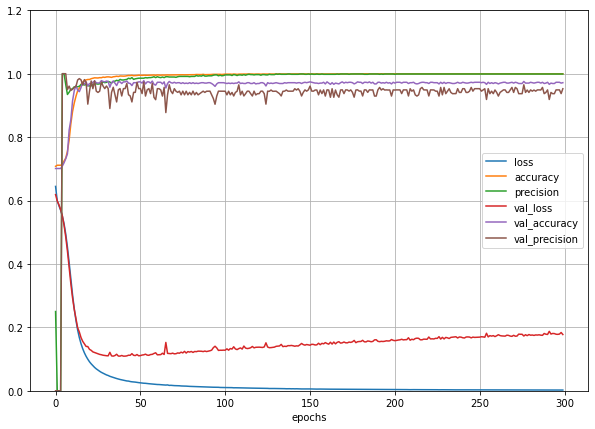

In [194]:
plt.figure(figsize=(12,7))
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel("epochs")
plt.show()

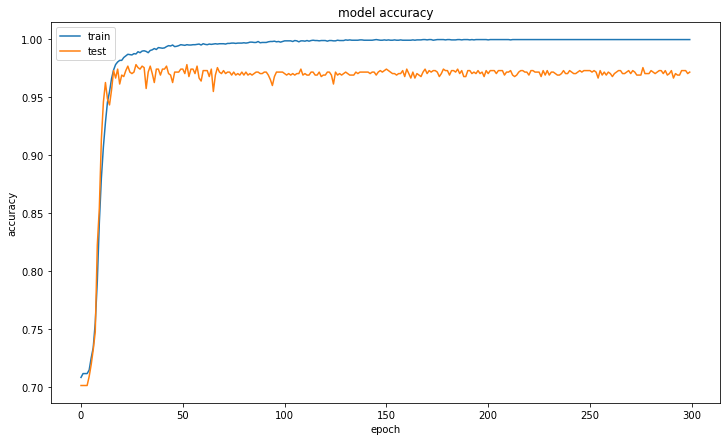

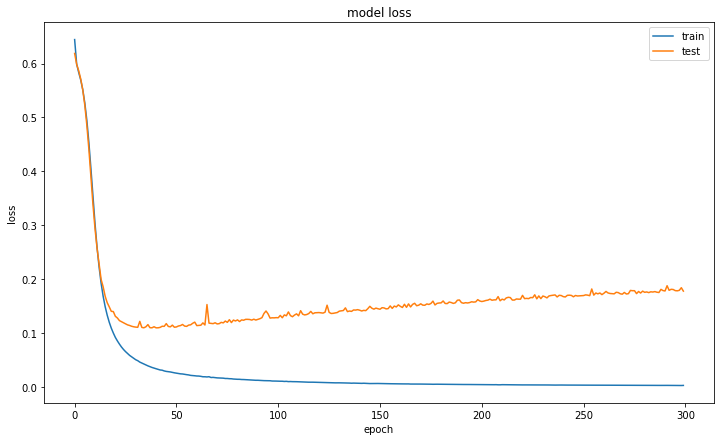

In [197]:
# summarize history for accuracy
plt.figure(figsize=(12,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.figure(figsize=(12,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

## 5. Validación con el conjunto de datos de pruebas

In [80]:
test_loss, test_acc, test_prec = model.evaluate(X_test, y_test) # evaluando el modelo con los datos de prueba

25/25 [==============================] - 0s 1ms/step - loss: 0.1111 - accuracy: 0.9742 - precision: 0.9511


In [81]:
print('test_acc:', test_acc) #accurancy de 97%
print('test_prec:', test_prec) #precision de 95%

test_acc: 0.9742268323898315
test_prec: 0.9511111378669739


## 6. Predicción de nuevos ejemplos

Utilizando la tabla con 5 datos que generamos anteriormente pondremos a prueba el modelo

In [182]:
# generando X_new y y_new con los valores de la tabla testdata
X_new = testdata.loc[:,'the':'dry'].values
y_new = testdata.loc[:,"Prediction"]

In [183]:
X_new = scaler.transform(X_new) #scalando los datos

In [184]:
# Relizamos la prediccion
y_proba = model.predict(X_new)

In [185]:
y_proba #resultado de predicción

array([[1.0512126e-18],
       [9.9642050e-01],
       [9.9999607e-01],
       [1.8096360e-20]], dtype=float32)

In [186]:
y_proba.round(2) # redondeando los datos resultantes para compararlos con los datos de y_new

array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [187]:
y_new

0    0
1    1
2    1
3    0
Name: Prediction, dtype: int64

## 7. Guardar el modelo en disco

De la forma que se indica a continuación, vamos a exportar en un archivo h5 los siguientes componentes de la red neuronal: 
* La arquitectura del modelo
* Los parámetros del modelo
* Los hiperparámetros del modelo
* Las métricas

In [188]:
# Guardamos el modelo en disco
model.save("./modelo/modelo_spam.h5")